In [181]:
!git clone https://github.com/roneysco/Fake.br-Corpus


fatal: destination path 'Fake.br-Corpus' already exists and is not an empty directory.


In [182]:
import os
import pandas as pd

#Criar os dataframes com os textos e os metadados e depois juntar os dois
text_dirs = {'fake': 'Fake.br-Corpus/full_texts/fake',
             'true': 'Fake.br-Corpus/full_texts/true'}
meta_dirs = {'fake': 'Fake.br-Corpus/full_texts/fake-meta-information',
             'true': 'Fake.br-Corpus/full_texts/true-meta-information'}


texts_data = []
meta_data = []


def read_text_files(dir_path, label):
    for filename in sorted(os.listdir(dir_path), key=lambda x: int(re.match(r"\d+", x).group())):
        if filename.endswith('.txt'):
            with open(os.path.join(dir_path, filename), 'r', encoding='utf-8') as file:
                text = file.read()
                texts_data.append({'label': label, 'full_text': text})


def read_meta_files(dir_path):
    for filename in sorted(os.listdir(dir_path), key=lambda x: int(re.match("[0-9]+", x).group())):
        if filename.endswith('.txt'):
            with open(os.path.join(dir_path, filename), 'r', encoding='utf-8') as file:
                lines = file.readlines()
                meta_data.append({
                    'author': lines[0].strip(),
                    'link': lines[1].strip(),
                    'category': lines[2].strip(),
                    'date of publication': lines[3].strip(),
                    'number of tokens': lines[4].strip(),
                    'number of words without punctuation': lines[5].strip(),
                    'number of types': lines[6].strip(),
                    'number of links inside the news': lines[7].strip(),
                    'number of words in upper case': lines[8].strip(),
                    'number of verbs': lines[9].strip(),
                    'number of subjuntive and imperative verbs': lines[10].strip(),
                    'number of nouns': lines[11].strip(),
                    'number of adjectives': lines[12].strip(),
                    'number of adverbs': lines[13].strip(),
                    'number of modal verbs (mainly auxiliary verbs)': lines[14].strip(),
                    'number of singular first and second personal pronouns': lines[15].strip(),
                    'number of plural first personal pronouns': lines[16].strip(),
                    'number of pronouns': lines[17].strip(),
                    'pausality': lines[18].strip(),
                    'number of characters': lines[19].strip(),
                    'average sentence length': lines[20].strip(),
                    'average word length': lines[21].strip(),
                    'percentage of news with speeling errors': lines[22].strip(),
                    'emotiveness': lines[23].strip(),
                    'diversity': lines[24].strip()
                })

for label, dir_path in text_dirs.items():
    read_text_files(dir_path, label)


for label, dir_path in meta_dirs.items():
    read_meta_files(dir_path)


df_texts = pd.DataFrame(texts_data)
df_meta = pd.DataFrame(meta_data)


df_completo = pd.concat([df_texts, df_meta], axis=1)




In [183]:
df_completo.head()

,label,full_text,author,link,category,date of publication,number of tokens,number of words without punctuation,number of types,number of links inside the news,...,number of singular first and second personal pronouns,number of plural first personal pronouns,number of pronouns,pausality,number of characters,average sentence length,average word length,percentage of news with speeling errors,emotiveness,diversity
0,fake,Kátia Abreu diz que vai colocar sua expulsão e...,mrk,https://ceticismopolitico.com/2017/11/30/katia...,politica,2017-11-30,211,185,120,0,...,2,0,26,2.0,815,14.2308,4.40541,0.0,0.263158,0.648649
1,fake,Blog esquerdista dá a entender que reclamar de...,None,https://ceticismopolitico.com/2017/11/28/blog-...,sociedade_cotidiano,2017-11-28,356,300,187,0,...,0,0,30,3.29412,1321,17.6471,4.40333,0.0133333,0.277372,0.623333
2,fake,"Alckmin diz que por ele PSDB desembarca, mas...",None,https://ceticismopolitico.com/2017/11/28/alckm...,politica,2017-11-28,274,224,150,0,...,1,0,14,3.57143,1075,16.0,4.79911,0.0,0.262136,0.669643
3,fake,Cara de pau não tem limites: Zé Celso aciona M...,None,https://ceticismopolitico.com/2017/11/28/cara-...,politica,2017-11-28,319,291,185,0,...,0,0,23,2.33333,1341,24.25,4.60825,0.00343643,0.18254,0.635739
4,fake,Temer resolve o problema de Luislinda: liberd...,None,https://ceticismopolitico.com/2017/11/27/temer...,politica,2017-11-27,162,133,96,0,...,0,0,12,2.63636,654,12.0909,4.91729,0.0,0.303571,0.721804


In [184]:
df_completo['id'] = df_completo['label'].map({'fake': 0, 'true': 1})

In [185]:
df_completo.to_csv('full_text.csv', index=False)

In [186]:
#importar as bibliotecas

import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn. linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
!pip install unidecode
from unidecode import unidecode
import nltk
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder, TrigramAssocMeasures, TrigramCollocationFinder

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [187]:
# Função para limpar o texto
def clean_text(full_text, max_words = 500):

  # Converter para minúsculas
  texto = full_text.lower()

  # Remover caracteres especiais
  texto = unidecode(texto)

  # Remover números
  texto = re.sub(r'\d+', '', texto)

  # Remover pontuações
  texto = re.sub(r'[^\w\s]', '', texto)

   #Trunca o texto para o número máximo de palavras
  if len(texto) > max_words:
      texto= texto[:max_words]


  return texto

In [188]:
df_completo['texto_normalizado'] = df_completo['full_text'].apply(clean_text)

In [189]:
df_completo.head()

,label,full_text,author,link,category,date of publication,number of tokens,number of words without punctuation,number of types,number of links inside the news,...,number of pronouns,pausality,number of characters,average sentence length,average word length,percentage of news with speeling errors,emotiveness,diversity,id,texto_normalizado
0,fake,Kátia Abreu diz que vai colocar sua expulsão e...,mrk,https://ceticismopolitico.com/2017/11/30/katia...,politica,2017-11-30,211,185,120,0,...,26,2.0,815,14.2308,4.40541,0.0,0.263158,0.648649,0,katia abreu diz que vai colocar sua expulsao e...
1,fake,Blog esquerdista dá a entender que reclamar de...,None,https://ceticismopolitico.com/2017/11/28/blog-...,sociedade_cotidiano,2017-11-28,356,300,187,0,...,30,3.29412,1321,17.6471,4.40333,0.0133333,0.277372,0.623333,0,blog esquerdista da a entender que reclamar de...
2,fake,"Alckmin diz que por ele PSDB desembarca, mas...",None,https://ceticismopolitico.com/2017/11/28/alckm...,politica,2017-11-28,274,224,150,0,...,14,3.57143,1075,16.0,4.79911,0.0,0.262136,0.669643,0,alckmin diz que por ele psdb desembarca mas na...
3,fake,Cara de pau não tem limites: Zé Celso aciona M...,None,https://ceticismopolitico.com/2017/11/28/cara-...,politica,2017-11-28,319,291,185,0,...,23,2.33333,1341,24.25,4.60825,0.00343643,0.18254,0.635739,0,cara de pau nao tem limites ze celso aciona mp...
4,fake,Temer resolve o problema de Luislinda: liberd...,None,https://ceticismopolitico.com/2017/11/27/temer...,politica,2017-11-27,162,133,96,0,...,12,2.63636,654,12.0909,4.91729,0.0,0.303571,0.721804,0,temer resolve o problema de luislinda liberdad...


In [190]:
#Função para remover as stopwords
def remove_stopwords(texto_normalizado):
  stop_words = set(stopwords.words('portuguese'))
  words = word_tokenize(texto_normalizado)
  palavras_sem_stopwords = [word for word in words if word.lower() not in stop_words]

  return ' '.join(palavras_sem_stopwords)

In [191]:
df_completo['texto_normalizado'] = df_completo['texto_normalizado'].apply(remove_stopwords)

In [192]:
#Função para fazer o Stemming
def stemmer_text(texto_normalizado):
  stemmer = PorterStemmer()
  words = word_tokenize(texto_normalizado)
  stemmed_words = [stemmer.stem(word) for word in words]

  return ' '.join(stemmed_words)

In [193]:
df_completo['texto_normalizado'] = df_completo['texto_normalizado'].apply(stemmer_text)

In [194]:
df_completo['text_tokenize'] = df_completo['texto_normalizado'].apply(nltk.word_tokenize)

In [195]:
# Orgaznizar as colunas do dataframe
col = df_completo.pop('id')
df_completo.insert(0, col.name, col)

col = df_completo.pop('texto_normalizado')
df_completo.insert(3, col.name, col)

col = df_completo.pop('text_tokenize')
df_completo.insert(4, col.name, col)

In [196]:
df_completo.head()

,id,label,full_text,texto_normalizado,text_tokenize,author,link,category,date of publication,number of tokens,...,number of singular first and second personal pronouns,number of plural first personal pronouns,number of pronouns,pausality,number of characters,average sentence length,average word length,percentage of news with speeling errors,emotiveness,diversity
0,0,fake,Kátia Abreu diz que vai colocar sua expulsão e...,katia abreu diz vai colocar expulsao moldura n...,"[katia, abreu, diz, vai, colocar, expulsao, mo...",mrk,https://ceticismopolitico.com/2017/11/30/katia...,politica,2017-11-30,211,...,2,0,26,2.0,815,14.2308,4.40541,0.0,0.263158,0.648649
1,0,fake,Blog esquerdista dá a entender que reclamar de...,blog esquerdista entend reclamar dedada futebo...,"[blog, esquerdista, entend, reclamar, dedada, ...",None,https://ceticismopolitico.com/2017/11/28/blog-...,sociedade_cotidiano,2017-11-28,356,...,0,0,30,3.29412,1321,17.6471,4.40333,0.0133333,0.277372,0.623333
2,0,fake,"Alckmin diz que por ele PSDB desembarca, mas...",alckmin diz psdb desembarca nao explica utiliz...,"[alckmin, diz, psdb, desembarca, nao, explica,...",None,https://ceticismopolitico.com/2017/11/28/alckm...,politica,2017-11-28,274,...,1,0,14,3.57143,1075,16.0,4.79911,0.0,0.262136,0.669643
3,0,fake,Cara de pau não tem limites: Zé Celso aciona M...,cara pau nao limit ze celso aciona mp contra s...,"[cara, pau, nao, limit, ze, celso, aciona, mp,...",None,https://ceticismopolitico.com/2017/11/28/cara-...,politica,2017-11-28,319,...,0,0,23,2.33333,1341,24.25,4.60825,0.00343643,0.18254,0.635739
4,0,fake,Temer resolve o problema de Luislinda: liberd...,temer resolv problema luislinda liberdad ainda...,"[temer, resolv, problema, luislinda, liberdad,...",None,https://ceticismopolitico.com/2017/11/27/temer...,politica,2017-11-27,162,...,0,0,12,2.63636,654,12.0909,4.91729,0.0,0.303571,0.721804


In [197]:
df_completo.to_csv('dataframe_final.csv', index=False)

In [198]:
#Criar uma função para identificar bigramas e trigramas e calcular a quantidade
def extrair_ngrams(text_tokenize, tipo='bigram', n=None, freq_min=3):

    if tipo == 'bigram':
        measures = BigramAssocMeasures()
        finder = BigramCollocationFinder.from_words(text_tokenize)
    elif tipo == 'trigram':
        measures = TrigramAssocMeasures()
        finder = TrigramCollocationFinder.from_words(text_tokenize)
    else:
        raise ValueError("Tipo de N-grama inválido. Use 'bigram' ou 'trigram'.")



    finder.apply_freq_filter(freq_min)

    ngrams = finder.score_ngrams(measures.raw_freq)

    if n:
        return ngrams[:n]
    return ngrams

df_true = df_completo[df_completo["label"] == "true"]
df_fake = df_completo[df_completo["label"] == "fake"]

# Concatenar todos os tokens
full_tokens_true = [token for sublist in df_true['text_tokenize'].tolist() for token in sublist]
full_tokens_fake = [token for sublist in df_fake['text_tokenize'].tolist() for token in sublist]

# Encontrar bigramas e trigramas true
bigramas_true = extrair_ngrams(full_tokens_true, tipo='bigram', freq_min=5)
trigramas_true = extrair_ngrams(full_tokens_true, tipo='trigram',freq_min=5)

# Encontrar bigramas e trigramas fake
bigramas_fake = extrair_ngrams(full_tokens_fake, tipo='bigram', freq_min=5)
trigramas_fake = extrair_ngrams(full_tokens_fake, tipo='trigram',freq_min=5)

# Contagem de palavras, bigramas e trigramas true
contagem_palavras_true = len(full_tokens_true)
contagem_bigramas_true = len(bigramas_true)
contagem_trigramas_true = len(trigramas_true)

# Contagem de palavras, bigramas e trigramas fake
contagem_palavras_fake = len(full_tokens_fake)
contagem_bigramas_fake = len(bigramas_fake)
contagem_trigramas_fake = len(trigramas_fake)

print(f"Número de palavras verdadeiras: {contagem_palavras_true}")
print(f"Número de bigramas verdadeiros: {contagem_bigramas_true}")
print(f"Número de trigramas verdadeiros: {contagem_trigramas_true}")

print(f"Número de palavras falsas: {contagem_palavras_fake}")
print(f"Número de bigramas falsos: {contagem_bigramas_fake}")
print(f"Número de trigramas falsos: {contagem_trigramas_fake}")


Número de palavras verdadeiras: 185584
Número de bigramas verdadeiros: 2754
Número de trigramas verdadeiros: 903
Número de palavras falsas: 179969
Número de bigramas falsos: 2323
Número de trigramas falsos: 384


In [199]:
# Separa os conjuntos de treinamento = 75 e teste = 25
X_train, X_test, y_train, y_test = train_test_split(df_completo['texto_normalizado'], df_completo['label'], test_size=0.25, random_state=42, shuffle=True)

In [200]:
# Vetoriza os dados usando o TF-IDF
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2))
vetor_treino = tfidf_vectorizer.fit_transform(X_train)
vetor_teste = tfidf_vectorizer.transform(X_test)


In [201]:
from sklearn.naive_bayes import MultinomialNB
ru = 4255427
clf = MultinomialNB()
clf.fit(vetor_treino, y_train)

# Calcula a acurácia do modelo nos dados de teste
accuracy = clf.score(vetor_teste, y_test)
print(f'Acurácia: {accuracy:.2%}, RU: {ru}')

Acurácia: 85.50%, RU: 4255427


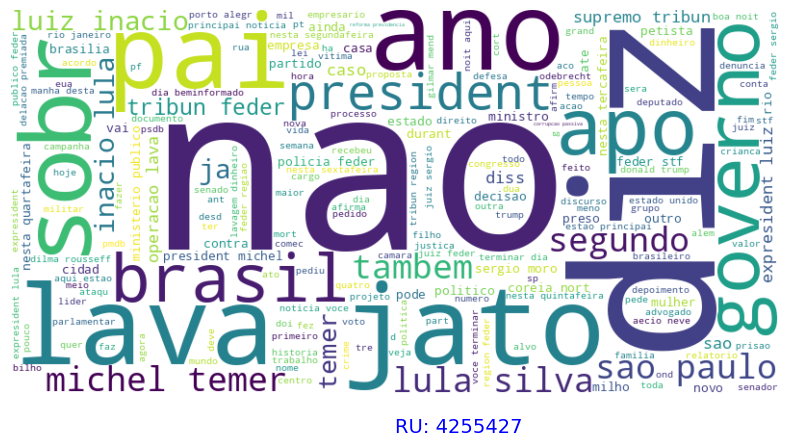

In [202]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
#criar a wordclowd das notícias verdadeiras
true_text = ' '.join(df_completo[df_completo['label'] == 'true']['texto_normalizado'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(true_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.text(0.5, -0.1, 'RU: 4255427', fontsize=14, transform=plt.gca().transAxes, color='blue')

plt.show()

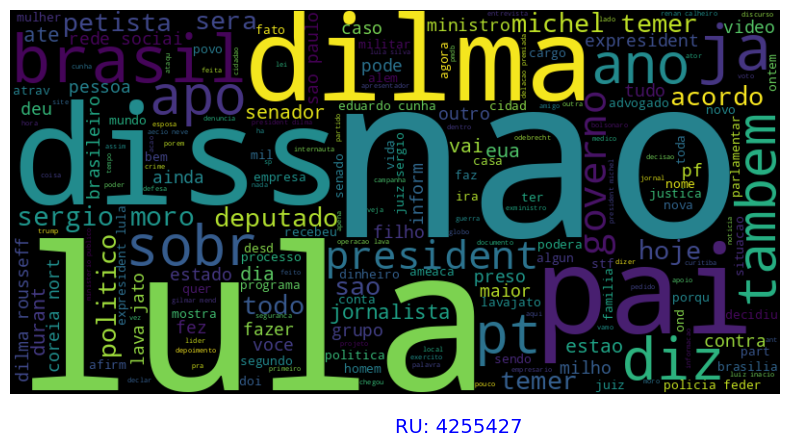

In [203]:
# Criar a wordcloud da notícias falsas
fake_text = ' '.join(df_completo[df_completo['label'] == 'fake']['texto_normalizado'])

wordcloud = WordCloud(width=800, height=400, background_color='black').generate(fake_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.text(0.5, -0.1, 'RU: 4255427', fontsize=14, transform=plt.gca().transAxes, color='blue')

plt.show()